Importing the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Looking the Data

In [65]:
iris = pd.read_csv(r"C:\Users\karun\Downloads\portfolio project 1\Internship\Iris flower classification\archive\IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Describing the Data

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Findin the no of NUll values

In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Plotting with pairplot

<Figure size 200x200 with 0 Axes>

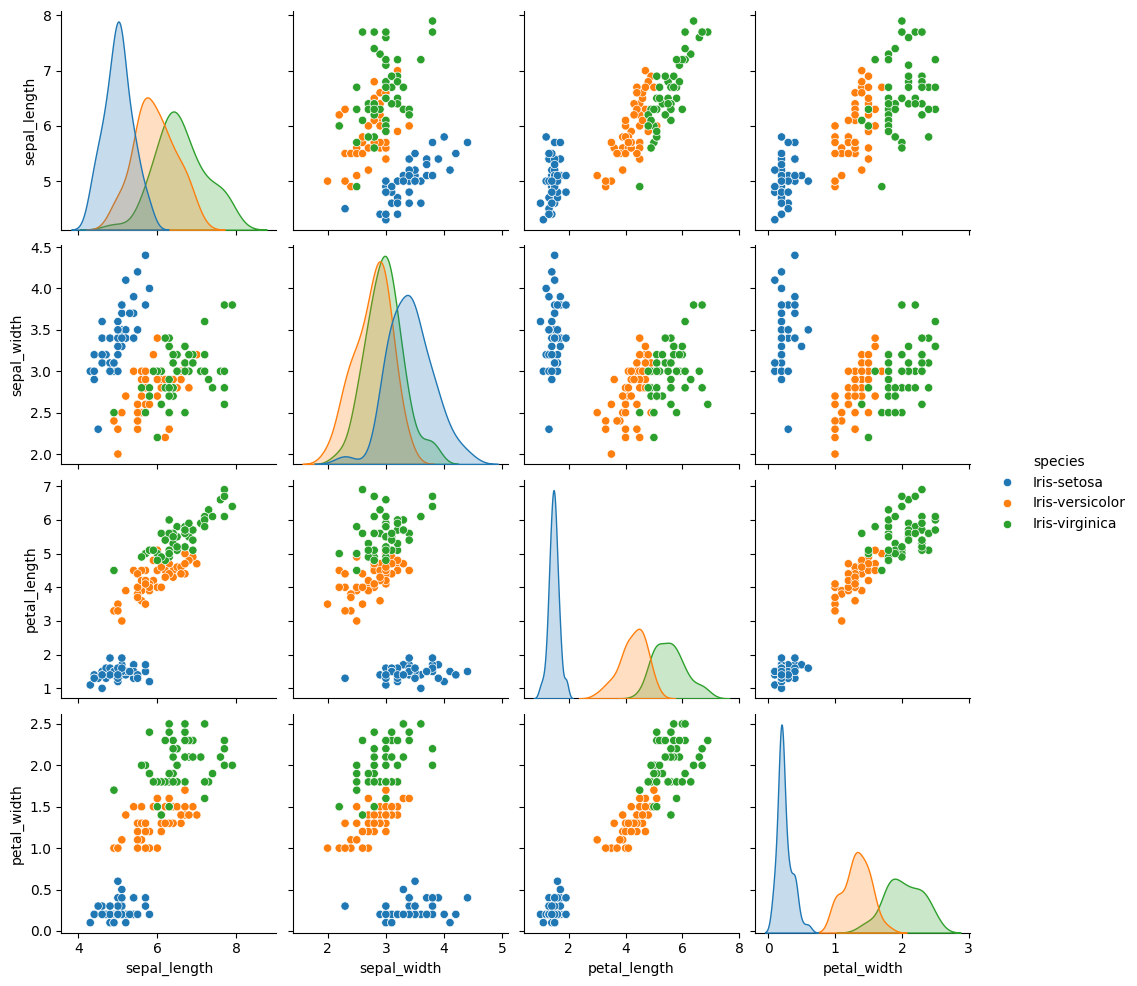

In [6]:
plt.figure(figsize=(2,2))
sns.pairplot(iris,hue='species')
plt.show()

Importing Libraries for machine Learning

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler


In [14]:
x = iris[['sepal_length','sepal_width','petal_length','petal_width']]
y= iris['species'].values

Melitng the data and plotting it 

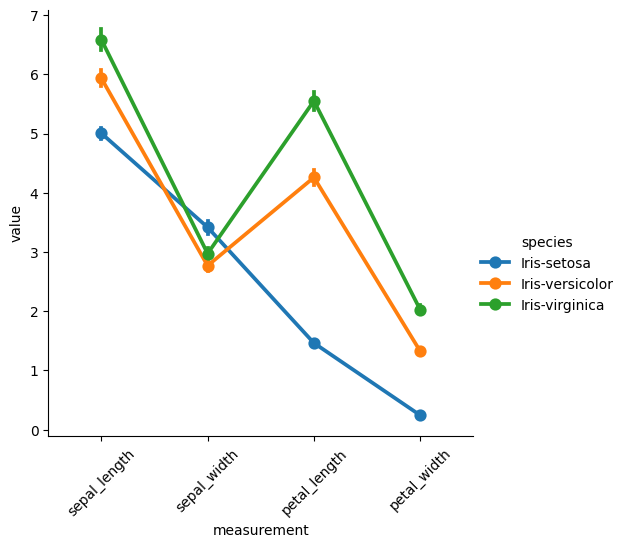

In [26]:
iris_melted = iris.melt(id_vars='species', 
                           value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                           var_name='measurement', value_name='value')
sns.catplot(x='measurement', y='value', hue='species', data=iris_melted, kind='point')
plt.xticks(rotation=45)
plt.show()


Splitting the Dataset  into Training and Testing

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
scaler =StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


Plotting the Training and Testing Data

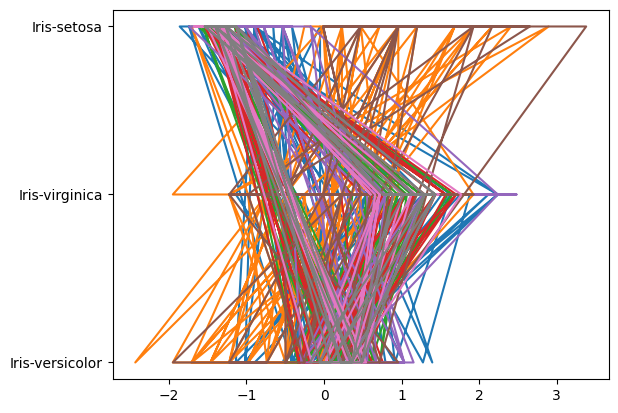

In [54]:
plt.plot(x_train,y_train)
plt.plot(x_test,y_test)
plt.show()


Finding the Accuracy using Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

print('Accuaracy:',accuracy_score(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

print('confusion matrix:\n',confusion_matrix(y_test,y_pred))


Accuaracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

confusion matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Finding the Accuracy using KNN Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors =5)
knn.fit(x_train,y_train)

y_pred_knn = knn.predict(x_test)

print('K-NN Acurracy:',accuracy_score(y_test,y_pred_knn))

K-NN Acurracy: 1.0


In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':range(1,10)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(x_train,y_train)

print('Best parameters for k-NN:',grid_search.best_params_)

Best parameters for k-NN: {'n_neighbors': 3}


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100,random_state=42)

cv_score = cross_val_score(rf,x_train,y_train,cv=5)
print('cross-validation scores:',cv_score)
print('mean cv scores:',cv_score.mean())


cross-validation scores: [0.95238095 0.9047619  0.9047619  1.         0.95238095]
mean cv scores: 0.9428571428571428
